In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [2]:
data= pd.read_csv('CO2 Emissions_Canada.csv')

In [3]:
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
data.shape

(7385, 12)

In [5]:
data.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [6]:
data.duplicated().sum()

1103

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6282 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              6282 non-null   object 
 1   Model                             6282 non-null   object 
 2   Vehicle Class                     6282 non-null   object 
 3   Engine Size(L)                    6282 non-null   float64
 4   Cylinders                         6282 non-null   int64  
 5   Transmission                      6282 non-null   object 
 6   Fuel Type                         6282 non-null   object 
 7   Fuel Consumption City (L/100 km)  6282 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   6282 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  6282 non-null   float64
 10  Fuel Consumption Comb (mpg)       6282 non-null   int64  
 11  CO2 Emissions(g/km)               6282 non-null   int64  
dtypes: flo

In [9]:
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


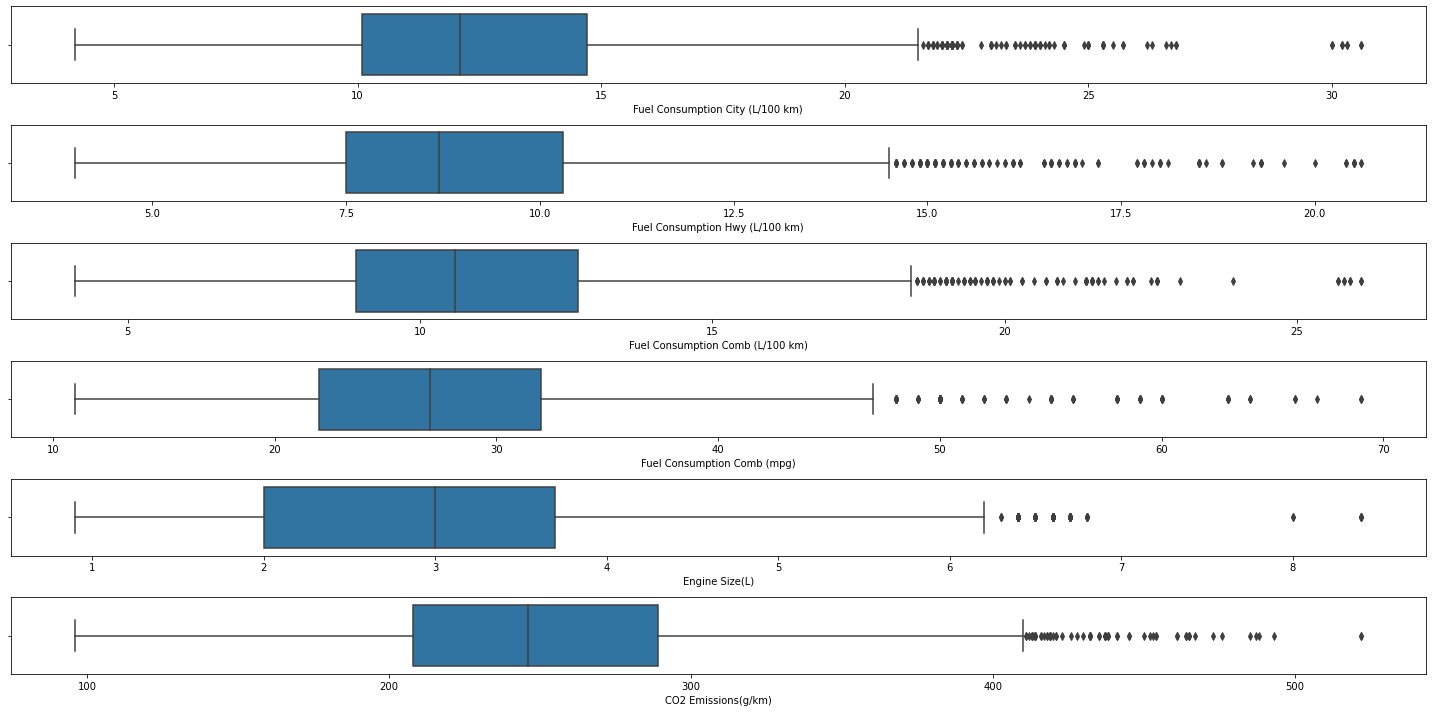

In [10]:
fig, axs = plt.subplots(6, figsize=(20,10))
plt1 = sns.boxplot(data['Fuel Consumption City (L/100 km)'], ax = axs[0])
plt2 = sns.boxplot(data['Fuel Consumption Hwy (L/100 km)'], ax = axs[1])
plt3 = sns.boxplot(data['Fuel Consumption Comb (L/100 km)'], ax = axs[2])
plt4 = sns.boxplot(data['Fuel Consumption Comb (mpg)'], ax = axs[3])
plt5 = sns.boxplot(data['Engine Size(L)'], ax =axs[4])
plt6 = sns.boxplot(data['CO2 Emissions(g/km)'], ax =axs[5])
plt.tight_layout()

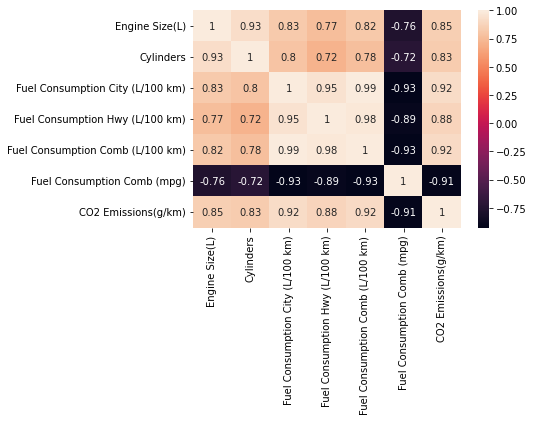

In [11]:
sns.heatmap(data.corr(), annot = True)
plt.show()

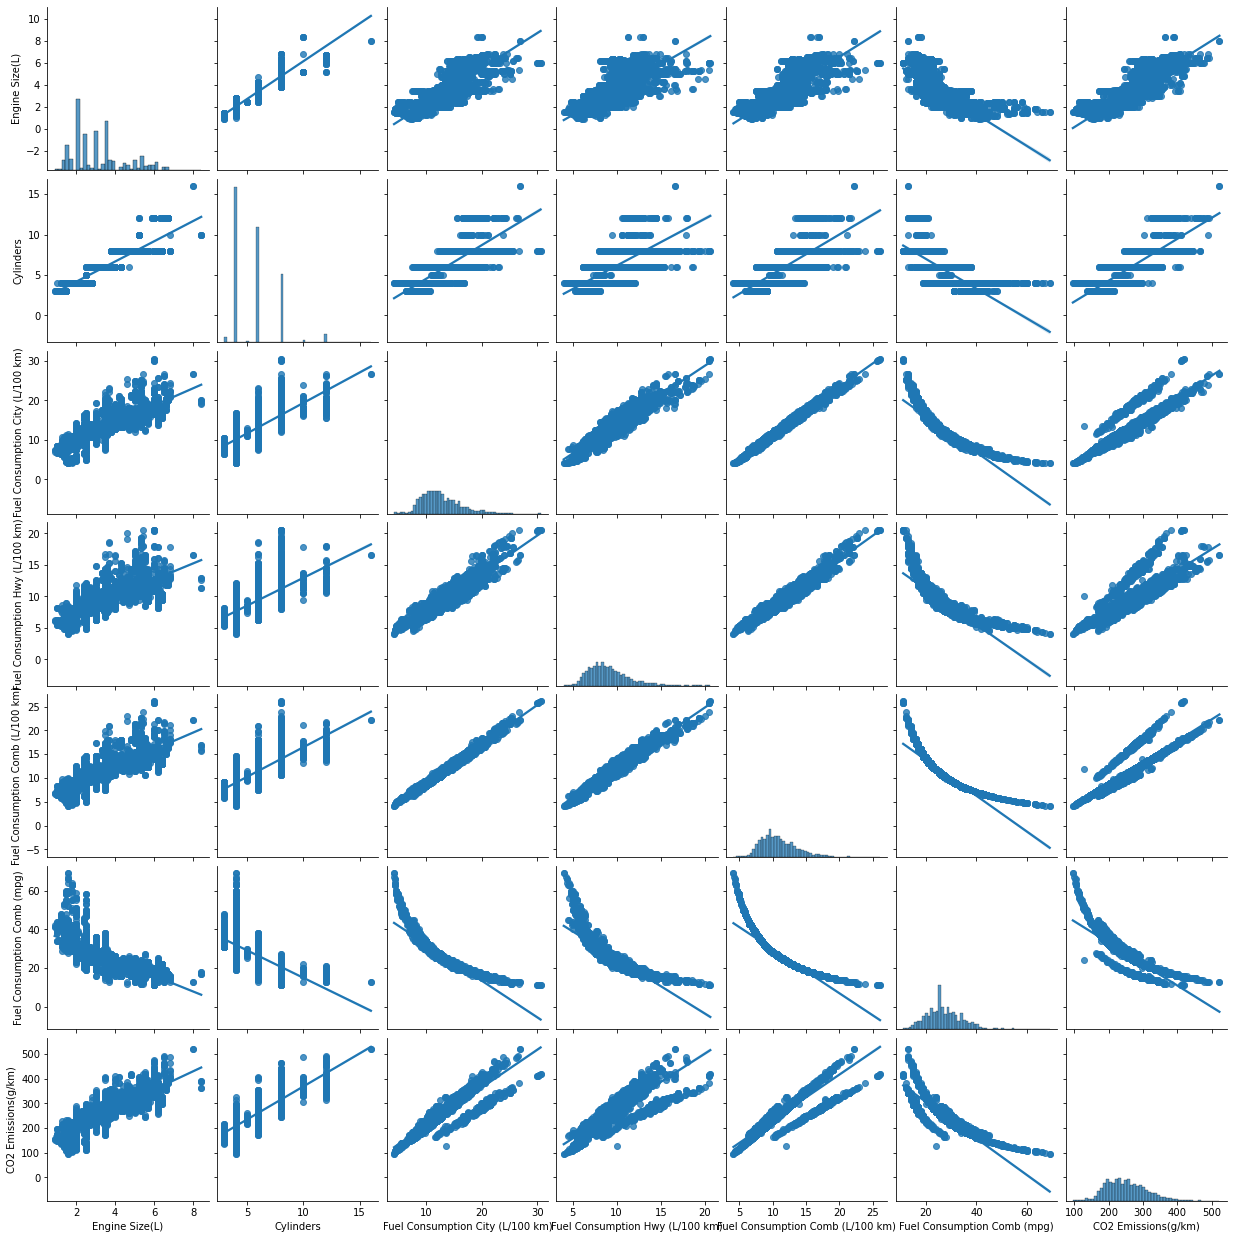

In [12]:
sns.pairplot(data,kind="reg")
plt.show()

In [13]:
X = data[["Make","Vehicle Class","Transmission","Fuel Type","Engine Size(L)","Cylinders","Fuel Consumption Comb (L/100 km)"]]
Y = data[["CO2 Emissions(g/km)"]]
X.head(10)

,Make,Vehicle Class,Transmission,Fuel Type,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km)
0,ACURA,COMPACT,AS5,Z,2.0,4,8.5
1,ACURA,COMPACT,M6,Z,2.4,4,9.6
2,ACURA,COMPACT,AV7,Z,1.5,4,5.9
3,ACURA,SUV - SMALL,AS6,Z,3.5,6,11.1
4,ACURA,SUV - SMALL,AS6,Z,3.5,6,10.6
5,ACURA,MID-SIZE,AS6,Z,3.5,6,10.0
6,ACURA,MID-SIZE,AS6,Z,3.5,6,10.1
7,ACURA,MID-SIZE,AS6,Z,3.7,6,11.1
8,ACURA,MID-SIZE,M6,Z,3.7,6,11.6
9,ACURA,COMPACT,AS5,Z,2.4,4,9.2


Since each categorical feature has a strong relationship with Emission we should use ordinal encoding
We will not convert 'Model' as we are dropping the feature later

In [14]:
from sklearn.preprocessing import OrdinalEncoder
oc = OrdinalEncoder()
cols = ["Make","Vehicle Class","Transmission","Fuel Type"]
X[cols] = oc.fit_transform(X[cols])

In [15]:
X.head(10)

,Make,Vehicle Class,Transmission,Fuel Type,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km)
0,0.0,0.0,14.0,4.0,2.0,4,8.5
1,0.0,0.0,25.0,4.0,2.4,4,9.6
2,0.0,0.0,22.0,4.0,1.5,4,5.9
3,0.0,11.0,15.0,4.0,3.5,6,11.1
4,0.0,11.0,15.0,4.0,3.5,6,10.6
5,0.0,2.0,15.0,4.0,3.5,6,10.0
6,0.0,2.0,15.0,4.0,3.5,6,10.1
7,0.0,2.0,15.0,4.0,3.7,6,11.1
8,0.0,2.0,25.0,4.0,3.7,6,11.6
9,0.0,0.0,14.0,4.0,2.4,4,9.2


In [16]:
X['Vehicle Class'].value_counts(), data['Vehicle Class'].value_counts()

(11.0    1006
 2.0      983
 0.0      903
 12.0     613
 10.0     533
 1.0      508
 6.0      475
 13.0     381
 3.0      274
 9.0      214
 5.0      133
 15.0      66
 7.0       65
 4.0       61
 8.0       45
 14.0      22
 Name: Vehicle Class, dtype: int64,
 SUV - SMALL                 1006
 MID-SIZE                     983
 COMPACT                      903
 SUV - STANDARD               613
 SUBCOMPACT                   533
 FULL-SIZE                    508
 PICKUP TRUCK - STANDARD      475
 TWO-SEATER                   381
 MINICOMPACT                  274
 STATION WAGON - SMALL        214
 PICKUP TRUCK - SMALL         133
 VAN - PASSENGER               66
 SPECIAL PURPOSE VEHICLE       65
 MINIVAN                       61
 STATION WAGON - MID-SIZE      45
 VAN - CARGO                   22
 Name: Vehicle Class, dtype: int64)

In [17]:
[X['Make'].value_counts(),data['Make'].value_counts()]

[13.0    577
 9.0     515
 5.0     501
 28.0    365
 32.0    296
 15.0    289
 39.0    276
 3.0     263
 31.0    213
 29.0    200
 20.0    200
 21.0    192
 40.0    187
 17.0    184
 11.0    180
 16.0    164
 8.0     141
 24.0    129
 27.0    127
 38.0    119
 41.0    118
 19.0    118
 7.0      92
 18.0     87
 25.0     81
 23.0     76
 30.0     73
 33.0     72
 10.0     64
 12.0     56
 26.0     52
 0.0      51
 34.0     48
 2.0      39
 22.0     37
 4.0      35
 35.0     21
 1.0      19
 14.0     14
 36.0      7
 6.0       2
 37.0      2
 Name: Make, dtype: int64,
 FORD             577
 CHEVROLET        515
 BMW              501
 MERCEDES-BENZ    365
 PORSCHE          296
 GMC              289
 TOYOTA           276
 AUDI             263
 NISSAN           213
 JEEP             200
 MINI             200
 KIA              192
 VOLKSWAGEN       187
 HYUNDAI          184
 DODGE            180
 HONDA            164
 CADILLAC         141
 LEXUS            129
 MAZDA            127
 SUBARU  

In [18]:
[X["Fuel Type"].value_counts(),data["Fuel Type"].value_counts()]

[3.0    3039
 4.0    2765
 1.0     330
 0.0     147
 2.0       1
 Name: Fuel Type, dtype: int64,
 X    3039
 Z    2765
 E     330
 D     147
 N       1
 Name: Fuel Type, dtype: int64]

In [19]:
[X["Transmission"].value_counts(),data["Transmission"].value_counts()]

[15.0    1139
 17.0    1056
 25.0     773
 3.0      684
 9.0      383
 5.0      378
 16.0     283
 6.0      263
 19.0     241
 24.0     168
 12.0     151
 8.0      107
 22.0      92
 21.0      89
 2.0       78
 26.0      78
 18.0      65
 1.0       61
 10.0      45
 4.0       44
 23.0      34
 0.0       28
 14.0      26
 20.0       9
 7.0        4
 13.0       2
 11.0       1
 Name: Transmission, dtype: int64,
 AS6     1139
 AS8     1056
 M6       773
 A6       684
 AM7      383
 A8       378
 AS7      283
 A9       263
 AV       241
 M5       168
 AS10     151
 AM6      107
 AV7       92
 AV6       89
 A5        78
 M7        78
 AS9       65
 A4        61
 AM8       45
 A7        44
 AV8       34
 A10       28
 AS5       26
 AV10       9
 AM5        4
 AS4        2
 AM9        1
 Name: Transmission, dtype: int64]

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cols = ["Make","Vehicle Class","Transmission","Fuel Type","Engine Size(L)","Cylinders","Fuel Consumption Comb (L/100 km)"]
X[cols] = sc.fit_transform(X[cols])

In [21]:
X.head()

,Make,Vehicle Class,Transmission,Fuel Type,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km)
0,-1.701933,-1.312304,-0.011262,0.826751,-0.851086,-0.876934,-0.854490
1,-1.701933,-1.312304,1.505765,0.826751,-0.558066,-0.876934,-0.481184
2,-1.701933,-1.312304,1.092030,0.826751,-1.217362,-0.876934,-1.736851
3,-1.701933,0.966216,0.126649,0.826751,0.247740,0.206429,0.027870
4,-1.701933,0.966216,0.126649,0.826751,0.247740,0.206429,-0.141815


## Multiple Linear Regression

In [22]:
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.3, random_state=200)  

In [23]:
mlr= LinearRegression()  
mlr.fit(x_train, y_train) 

LinearRegression()

In [24]:
print(mlr.intercept_)

[251.23772561]


In [25]:
print( mlr.coef_)

[[ 0.72927424  3.86331746 -0.88088963  8.39641108  9.03798606  8.47645932
  39.6673847 ]]


In [26]:
y_pred= mlr.predict(x_test)  
x_pred= mlr.predict(x_train) 

In [27]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 13.009870735094198
Mean Square Error: 349.0226443336937
Root Mean Square Error: 18.68214774413514


In [28]:
r_squared_LR = r2_score(y_pred, y_test)
print('Test Accuracy:',r_squared_LR)
r_squared = r2_score(x_pred, y_train)
print('Train Accuracy:',r_squared)

Test Accuracy: 0.8946711089955147
Train Accuracy: 0.8901842018901868


In [29]:
newdata=[[0, 0,14,4,2,4,8.5]]
newdatasc=sc.transform(newdata)
mlr.predict(newdatasc)

array([[202.8575672]])

**Conclusion:** The model predicted the CO2 emission is 202(g/km) of vehicle ACURA,COMPACT,AS5,Z,2,4,8.5

## Polynomial Regression

### degree- 3

In [30]:
pl = PolynomialFeatures(degree=3)
pr2x_train = pl.fit_transform(x_train)
pr2X_test = pl.transform(x_test) 

In [31]:
mpr2 = LinearRegression()
mpr2.fit(pr2x_train , y_train)
pred = mpr2.predict(pr2X_test)
maepr2 = mean_absolute_error(y_test , pred)
msepr2 = mean_squared_error(y_test , pred)
rmepr2 = np.sqrt(mean_squared_error(y_test , pred))
print('Mean Absolute Error=',maepr2)
print('Mean Squared Error=',msepr2)
print('Root Mean Aquared Error',rmepr2)


Mean Absolute Error= 2.4448953833557834
Mean Squared Error= 10.130489353158502
Root Mean Aquared Error 3.182842967090664


In [32]:
rsquared = r2_score(pred, y_test)
print('Test Accuracy:',rsquared)
pred1 = mpr2.predict(pr2x_train)
r_squared = r2_score(pred1, y_train)
print('Train Accuracy:',r_squared)

Test Accuracy: 0.9972991242243856
Train Accuracy: 0.9973933310405038


In [33]:
newdata=[[0, 0,14,4,2,4,8.5]]
newdatasc=sc.transform(newdata)
newdatapl = pl.transform(newdatasc)
mpr2.predict(newdatapl)

array([[197.26953782]])

**Conclusion:** The model predicted the CO2 emission is 197(g/km) of vehicle ACURA,COMPACT,AS5,Z,2,4,8.5

so we can see that accuracy after polynomial regression increases as complexity of the model also increases which can lead to overfit of the data